In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [6]:
# 여러개의 범주형 자료 => 가변수 생성
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock','rock','pop','disco','pop']},
            columns=['m_id','m_gen'])

In [7]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


### Dummy 변수화

In [8]:
mm=pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
mm=df.join(mm.add_prefix('genre_')) # 접두사를 붙여준다
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


### MNIST
* 784개의 숫자 dataset
* 28*28 pixel로 구성된 숫자 이미지

In [10]:
import random
import matplotlib.pylab as plt
from tensorflow.examples.tutorials.mnist import input_data

In [11]:
mnist =input_data.read_data_sets("MNIST_data/",one_hot=True)
# one_hot속성 : 원핫인코딩을 가능하게 해준다

W0805 10:17:34.867235  4728 deprecation.py:323] From <ipython-input-11-11b8d4b7c127>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 10:17:34.871204  4728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 10:17:34.916200  4728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
I

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 10:17:36.577204  4728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 10:17:36.579203  4728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0805 10:17:37.368201  4728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
# 5만개의 train 이미지(입력,레이블) => 모델 생성하자!
# 나머지 1만개의 test 이미지 => 모델 => 출력결과로 정확도 측정

In [13]:
nb_classes=10 #분류결과의 종류 개수

In [26]:
x=tf.placeholder(tf.float32,[None,28*28])
y=tf.placeholder(tf.float32,[None,nb_classes])
w=tf.Variable(tf.random_normal([28*28,nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
hf=tf.nn.softmax(tf.matmul(x,w)+b)
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))  # cost :y*tf.log(hf),axis=1 값은 10개 나옴 
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct= tf.equal(tf.arg_max(hf,1),tf.arg_max(y,1)) # True/False 타입으로 반환
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32)) # True/False를 수치로 casting해준다

# 에폭(한번 train시키는 크기)
training_epochs=15 # 전체 5만개 이미지를 15번 트레이닝 시키겠다
batch_size=100 # 메모리 6만개 부담 --> 한번에 몇개씩 불러서 훈련시킬 지 설정 가능


In [ ]:
x = tf.placeholder(tf.float32, shape=[None,28*28])
y = tf.placeholder(tf.float32, [None,nb_classes])
w = tf.Variable(tf.random_normal([28*28,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
#에폭(전체 데이터를 1번 트레이닝 -> 1에폭)
training_epochs=15
batch_size=100

Epoch:    1 cost: 2.971945291
Epoch:    2 cost: 1.154447703
Epoch:    3 cost: 0.904347104
Epoch:    4 cost: 0.779623606
Epoch:    5 cost: 0.707641809
Epoch:    6 cost: 0.651804866
Epoch:    7 cost: 0.615054720
Epoch:    8 cost: 0.579407695
Epoch:    9 cost: 0.557437666
Epoch:   10 cost: 0.534092012
Epoch:   11 cost: 0.515025312
Epoch:   12 cost: 0.500082991
Epoch:   13 cost: 0.488053704
Epoch:   14 cost: 0.477433515
Epoch:   15 cost: 0.462180656
learning finished
accuarcy: 0.8888
Label: [7]
Prediction: [7]


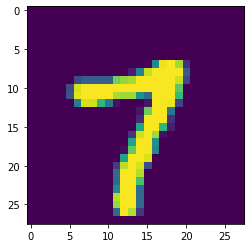

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs): # 5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) # 5만/100
        for i in range(total_batch): # 500번(1번에 100개씩 이미지를 읽겠다) => for문이 한번 다 돌면 에폭 1
            batch_xs, batch_ys=mnist.train.next_batch(batch_size) #이미지 100개씩 읽어오기 
            # batch_xs=[100,784], batch_ys=[100,10]
            cv,_=sess.run([cost,train], feed_dict={x:batch_xs,y:batch_ys}) # cv는 100개의 데이터에 대한 cost
            avg_cost+=cv/total_batch #100개 데이터 cost/500
        print("Epoch:","%4d" % (epoch+1),
             'cost:','{:.9f}'.format(avg_cost))
    print("learning finished")
    print("accuarcy:" ,sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
# 1,3,7,10,14 => 35/5=7
# 0.2, 0.6, 1.4,2,2.8 => 합은 7
    r=random.randint(0, mnist.test.num_examples-1) 
    # 0부터 텍스트 이미지 데이터 개수-1 사이의 값 중 랜덤으로 정수 난수 생성 => 테스트를 하고자하는 이미지 
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()

In [29]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [43]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    print("bias:",sess.run(b))


0 0.71578604 [[ 0.24707714]
 [-0.14661081]]
100 0.69411635 [[ 0.04508719]
 [-0.16620113]]
200 0.6934675 [[ 0.01391933]
 [-0.0989939 ]]
300 0.69325924 [[ 0.00142076]
 [-0.05890509]]
400 0.69318855 [[-0.00328716]
 [-0.03551498]]
500 0.6931633 [[-0.00448688]
 [-0.02170356]]
600 0.6931537 [[-0.00424014]
 [-0.01343755]]
700 0.69315 [[-0.00350924]
 [-0.00842261]]
800 0.6931484 [[-0.00271439]
 [-0.00533918]]
900 0.69314766 [[-0.00201685]
 [-0.00341903]]
1000 0.6931474 [[-0.00145998]
 [-0.00220904]]
1100 0.69314724 [[-0.00103814]
 [-0.0014383 ]]
1200 0.69314724 [[-0.00072885]
 [-0.00094265]]
1300 0.6931472 [[-0.00050699]
 [-0.00062122]]
1400 0.6931472 [[-0.00035022]
 [-0.00041125]]
1500 0.6931472 [[-0.0002407]
 [-0.0002733]]
1600 0.6931472 [[-0.00016477]
 [-0.00018218]]
1700 0.6931472 [[-0.00011243]
 [-0.00012173]]
1800 0.6931472 [[-7.6538854e-05]
 [-8.1507598e-05]]
1900 0.6931472 [[-5.200557e-05]
 [-5.465867e-05]]
2000 0.6931472 [[-3.5284982e-05]
 [-3.6701276e-05]]
2100 0.6931472 [[-2.3912409

### x-or문제를 해결하기 위한  NN을 이용

In [ ]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [41]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([2,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1, w2)+b2)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

False

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w1), sess.run(w2))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    print("\nbias:",sess.run(b1), sess.run(b2))

0 0.7626258 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
100 0.720684 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
200 0.7052001 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
300 0.6984741 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
400 0.6955222 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
500 0.6942134 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
600 0.6936282 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
700 0.693365 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
800 0.69324595 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
900 0.69319206 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
10

8500 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
8600 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
8700 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
8800 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
8900 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
9000 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
9100 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
9200 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
9300 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.02391611]]
9400 0.6931472 [[-0.8434391  -1.6633972 ]
 [-0.99575335  0.38346052]] [[-1.3421768 ]
 [-0.0

In [ ]:
# nn cost일 때, 최종 결과 0.0216 이었다

In [46]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1, w2)+b2)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w1), sess.run(w2))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
#     print("\nbias:",sess.run(b1), sess.run(b2))

0 1.5509574 [[ 1.5928658  -1.0538777   0.06384252  1.8868796  -2.5560505  -0.35594317
  -1.3895675  -0.16134493  0.30013213 -0.86006355]
 [ 0.11768428  0.46629733 -0.0408196   0.5670747   1.6395973  -0.30082026
  -0.3122813   1.8891128   0.28152275  0.92262805]] [[ 0.96771353]
 [ 0.58086634]
 [ 0.18506002]
 [ 0.12353066]
 [ 1.6955764 ]
 [ 1.0086122 ]
 [ 0.08790644]
 [ 2.0769646 ]
 [-0.07503262]
 [ 0.8470956 ]]
100 0.6541254 [[ 1.5596364  -1.0850301   0.06026197  1.8697044  -2.6401947  -0.35690373
  -1.40208     0.01544529  0.28974974 -0.94644475]
 [-0.06874602  0.408061   -0.01768565  0.54288393  1.8092598  -0.41830716
  -0.3078369   1.693887    0.34676164  0.87519604]] [[ 0.7369511 ]
 [ 0.09378711]
 [-0.45398602]
 [-0.31784216]
 [ 1.7741203 ]
 [ 0.74376214]
 [-0.26180518]
 [ 1.3985109 ]
 [-0.50258285]
 [ 0.6997678 ]]
200 0.6229464 [[ 1.5908993  -1.0845319   0.05122054  1.8533792  -2.7400947  -0.29054078
  -1.423701    0.29398417  0.25352538 -0.996939  ]
 [-0.21565968  0.40251377  0.00

2200 0.076336004 [[ 3.5539372  -1.2896743  -0.12484371  1.8672628  -5.40627     0.55551267
  -1.8259441   2.3206167  -0.34692994 -1.634601  ]
 [-4.0567536   1.713043    0.34196892  0.57723534  4.826066   -1.509867
  -0.76915437  2.2989256   1.4035228   1.3536075 ]] [[ 5.055357  ]
 [-1.863766  ]
 [-1.1697334 ]
 [ 0.09998827]
 [ 6.891511  ]
 [ 1.3964926 ]
 [-1.1058292 ]
 [ 2.032515  ]
 [-1.7150359 ]
 [ 1.1693305 ]]
2300 0.070505455 [[ 3.610108   -1.3110316  -0.12721281  1.8677015  -5.459705    0.56881577
  -1.8350161   2.34857    -0.35856158 -1.6539612 ]
 [-4.1270056   1.7548041   0.3478086   0.5795194   4.875756   -1.5305808
  -0.7953314   2.3263483   1.4246262   1.3762085 ]] [[ 5.1672797 ]
 [-1.9105515 ]
 [-1.1861461 ]
 [ 0.09386875]
 [ 7.0260787 ]
 [ 1.4080325 ]
 [-1.1197653 ]
 [ 2.0661993 ]
 [-1.738553  ]
 [ 1.1969707 ]]
2400 0.06538886 [[ 3.6621435  -1.3319391  -0.12932406  1.8680733  -5.5094395   0.5812758
  -1.8436109   2.3746862  -0.36960307 -1.6727141 ]
 [-4.19186     1.7941823 

4300 0.025132976 [[ 4.2336125  -1.6389076  -0.14690414  1.869853   -6.074881    0.7335754
  -1.9523902   2.6798747  -0.51853496 -1.9493139 ]
 [-4.896387    2.28271     0.42136657  0.59242004  5.4274354  -1.7909278
  -1.128472    2.675574    1.7035915   1.6881285 ]] [[ 6.495175  ]
 [-2.5161083 ]
 [-1.3750796 ]
 [-0.01092401]
 [ 8.670851  ]
 [ 1.5655308 ]
 [-1.2962772 ]
 [ 2.479066  ]
 [-2.0326571 ]
 [ 1.6073186 ]]
4400 0.024268508 [[ 4.251826   -1.6511899  -0.14728914  1.8698411  -6.093584    0.73910743
  -1.9563496   2.6902583  -0.5244712  -1.9608982 ]
 [-4.918755    2.3003266   0.42381844  0.59230775  5.443685   -1.7995943
  -1.1392959   2.687095    1.7133247   1.6991509 ]] [[ 6.5367093 ]
 [-2.5367906 ]
 [-1.3808239 ]
 [-0.01515439]
 [ 8.723746  ]
 [ 1.571255  ]
 [-1.3022017 ]
 [ 2.4923422 ]
 [-2.042531  ]
 [ 1.6229568 ]]
4500 0.023456186 [[ 4.2693815  -1.6631829  -0.14764984  1.8698272  -6.1116548   0.74449193
  -1.9601973   2.7003095  -0.5302847  -1.9722661 ]
 [-4.940315    2.317444

6500 0.013729515 [[ 4.526383   -1.8562822  -0.15178971  1.8691744  -6.3812623   0.8299946
  -2.0202224   2.8524754  -0.627086   -2.163843  ]
 [-5.2561088   2.5845547   0.46328267  0.5854647   5.690546   -1.9395758
  -1.3090742   2.8703887   1.8742491   1.880318  ]] [[ 7.1846704 ]
 [-2.8751829 ]
 [-1.4690952 ]
 [-0.08853728]
 [ 9.56107   ]
 [ 1.6683433 ]
 [-1.3982083 ]
 [ 2.7025197 ]
 [-2.20388   ]
 [ 1.8931965 ]]
6600 0.0134381 [[ 4.535981   -1.8641365  -0.1519043   1.8691386  -6.391518    0.8334594
  -2.022603    2.8583472  -0.63117653 -2.1719973 ]
 [-5.267913    2.5951588   0.4647506   0.58502406  5.69925    -1.9448112
  -1.3152242   2.8771265   1.8803968   1.8871814 ]] [[ 7.2080965 ]
 [-2.8879888 ]
 [-1.4722373 ]
 [-0.09144909]
 [ 9.591778  ]
 [ 1.6721433 ]
 [-1.4018064 ]
 [ 2.710233  ]
 [-2.2099926 ]
 [ 1.9039474 ]]
6700 0.013157783 [[ 4.545364   -1.8718582  -0.15201366  1.8691028  -6.401556    0.8368667
  -2.02494     2.8640995  -0.63521117 -2.180043  ]
 [-5.2794514   2.6055684   

8500 0.009488246 [[ 4.684997   -1.9920199  -0.15334316  1.8684591  -6.5524955   0.89017093
  -2.060908    2.9513137  -0.6997848  -2.3089702 ]
 [-5.451286    2.765886    0.48833528  0.57607114  5.8350873  -2.0293744
  -1.4124293   2.984619    1.9808648   1.9985847 ]] [[ 7.5788164 ]
 [-3.096128  ]
 [-1.5214753 ]
 [-0.13992652]
 [10.08189   ]
 [ 1.7351719 ]
 [-1.4599345 ]
 [ 2.8334596 ]
 [-2.3096151 ]
 [ 2.0839386 ]]
8600 0.009339722 [[ 4.6914682  -1.9978245  -0.15339178  1.8684233  -6.5595574   0.89276505
  -2.0626295   2.9554281  -0.70299345 -2.315377  ]
 [-5.4592505   2.7735615   0.48939347  0.5755824   5.841016   -2.0331907
  -1.4167211   2.9894085   1.9854492   2.0036328 ]] [[ 7.595216  ]
 [-3.1055765 ]
 [-1.5236315 ]
 [-0.14217533]
 [10.103756  ]
 [ 1.7380896 ]
 [-1.4625573 ]
 [ 2.8389628 ]
 [-2.3141518 ]
 [ 2.0923421 ]]
8700 0.009195463 [[ 4.6978273  -2.0035522  -0.1534386   1.8683876  -6.5665092   0.89532685
  -2.0643268   2.9594803  -0.7061679  -2.3217156 ]
 [-5.467082    2.78113

In [ ]:
# wide nn: 0.007로 cost가 줄어듬!!

In [48]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1, w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L1, w2)+b3)

w4=tf.Variable(tf.random_normal([10,10]))
b4=tf.Variable(tf.random_normal([10]))
hf=tf.sigmoid(tf.matmul(L1, w2)+b4)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step,"cost", sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)

0 cost 1.1329223
100 cost 0.8097989
200 cost 0.7234556
300 cost 0.7058482
400 cost 0.70191944
500 cost 0.6998411
600 cost 0.69809747
700 cost 0.69649434
800 cost 0.6949922
900 cost 0.69357073
1000 cost 0.6922129
1100 cost 0.69090277
1200 cost 0.68962574
1300 cost 0.68836796
1400 cost 0.6871165
1500 cost 0.68585885
1600 cost 0.6845832
1700 cost 0.6832781
1800 cost 0.6819323
1900 cost 0.6805347
2000 cost 0.6790744
2100 cost 0.67754
2200 cost 0.6759203
2300 cost 0.6742036
2400 cost 0.6723776
2500 cost 0.6704299
2600 cost 0.66834736
2700 cost 0.6661161
2800 cost 0.6637217
2900 cost 0.6611488
3000 cost 0.6583815
3100 cost 0.655403
3200 cost 0.6521958
3300 cost 0.6487416
3400 cost 0.64502156
3500 cost 0.6410165
3600 cost 0.63670653
3700 cost 0.63207203
3800 cost 0.6270933
3900 cost 0.6217511
4000 cost 0.61602706
4100 cost 0.60990393
4200 cost 0.6033657
4300 cost 0.5963987
4400 cost 0.58899134
4500 cost 0.58113515
4600 cost 0.5728246
4700 cost 0.56405795
4800 cost 0.5548374
4900 cost 0.545169

In [ ]:
# deep and wide 하게 주었을 경우 --> depth를 많이 줄 수록 vanishing gradient현상이 생긴다
#                                --> 변수가 영향을 미치지 않는정도가 된다

# HoW?? depth와 width 결정?? --> 연구 분야이다. 데이터 종류마다 다르다.

In [51]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1, w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2, w3)+b3)

w4=tf.Variable(tf.random_normal([10,10]))
b4=tf.Variable(tf.random_normal([10]))
L4=tf.sigmoid(tf.matmul(L3, w4)+b4)

w5=tf.Variable(tf.random_normal([10,10]))
b5=tf.Variable(tf.random_normal([10]))
L5=tf.sigmoid(tf.matmul(L4, w5)+b5)

w6=tf.Variable(tf.random_normal([10,10]))
b6=tf.Variable(tf.random_normal([10]))
L6=tf.sigmoid(tf.matmul(L5, w6)+b6)

w7=tf.Variable(tf.random_normal([10,10]))
b7=tf.Variable(tf.random_normal([10]))
L7=tf.sigmoid(tf.matmul(L6, w7)+b7)

w8=tf.Variable(tf.random_normal([10,10]))
b8=tf.Variable(tf.random_normal([10]))
L8=tf.sigmoid(tf.matmul(L7, w8)+b8)

w9=tf.Variable(tf.random_normal([10,10]))
b9=tf.Variable(tf.random_normal([10]))
L9=tf.sigmoid(tf.matmul(L8, w9)+b9)

w10=tf.Variable(tf.random_normal([10,1]))
b10=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L9, w10)+b10)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    #print("\nbias:",sess.run(b1), sess.run(b2))

0 cost: 1.3556536
100 cost: 0.69311523
200 cost: 0.69311297
300 cost: 0.6931107
400 cost: 0.6931084
500 cost: 0.693106
600 cost: 0.6931037
700 cost: 0.6931013
800 cost: 0.6930988
900 cost: 0.6930963
1000 cost: 0.6930938
1100 cost: 0.69309115
1200 cost: 0.69308853
1300 cost: 0.6930858
1400 cost: 0.69308317
1500 cost: 0.6930803
1600 cost: 0.69307745
1700 cost: 0.6930746
1800 cost: 0.6930716
1900 cost: 0.69306856
2000 cost: 0.6930654
2100 cost: 0.6930623
2200 cost: 0.69305897
2300 cost: 0.6930556
2400 cost: 0.6930521
2500 cost: 0.6930486
2600 cost: 0.693045
2700 cost: 0.6930413
2800 cost: 0.6930374
2900 cost: 0.69303346
3000 cost: 0.6930294
3100 cost: 0.6930251
3200 cost: 0.6930207
3300 cost: 0.6930163
3400 cost: 0.6930116
3500 cost: 0.69300693
3600 cost: 0.6930019
3700 cost: 0.69299674
3800 cost: 0.6929914
3900 cost: 0.6929859
4000 cost: 0.69298023
4100 cost: 0.69297415
4200 cost: 0.692968
4300 cost: 0.6929616
4400 cost: 0.69295484
4500 cost: 0.69294786
4600 cost: 0.6929406
4700 cost: 0.

### MNIST를 deep&wide하게 설계하여 정확도 90% 이상 모델링 해보자

In [55]:
nb_classes=10 #분류결과의 종류 개수

In [71]:
x = tf.placeholder(tf.float32, shape=[None,28*28])
y = tf.placeholder(tf.float32, [None,nb_classes])

w1 = tf.Variable(tf.random_normal([28*28,nb_classes]))
b1 = tf.Variable(tf.random_normal([nb_classes]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([nb_classes,nb_classes]))
b2=tf.Variable(tf.random_normal([nb_classes]))
L2=tf.sigmoid(tf.matmul(L1, w2)+b2)

w3=tf.Variable(tf.random_normal([nb_classes,nb_classes]))
b3=tf.Variable(tf.random_normal([nb_classes]))
L3=tf.sigmoid(tf.matmul(L2, w2)+b2)

hf = tf.nn.softmax(tf.matmul(L3,w3)+b3)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.2).minimize(cost)
is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
#에폭(전체 데이터를 1번 트레이닝 -> 1에폭)
training_epochs=15
batch_size=100

Epoch:    1 cost: 1.877761603
Epoch:    2 cost: 1.170034458
Epoch:    3 cost: 0.906895040
Epoch:    4 cost: 0.777582135
Epoch:    5 cost: 0.698843233
Epoch:    6 cost: 0.640359199
Epoch:    7 cost: 0.595787952
Epoch:    8 cost: 0.559770645
Epoch:    9 cost: 0.530256573
Epoch:   10 cost: 0.506764115
Epoch:   11 cost: 0.484994674
Epoch:   12 cost: 0.466848878
Epoch:   13 cost: 0.451792731
Epoch:   14 cost: 0.437771664
Epoch:   15 cost: 0.425576690
learning finished
accuarcy: 0.8742
Label: [9]
Prediction: [9]


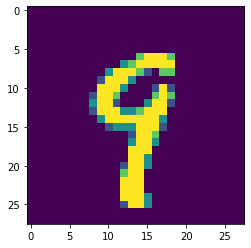

In [72]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs): # 5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) # 5만/100
        for i in range(total_batch): # 500번(1번에 100개씩 이미지를 읽겠다) => for문이 한번 다 돌면 에폭 1
            batch_xs, batch_ys=mnist.train.next_batch(batch_size) #이미지 100개씩 읽어오기 
            # batch_xs=[100,784], batch_ys=[100,10]
            cv,_=sess.run([cost,train], feed_dict={x:batch_xs,y:batch_ys}) # cv는 100개의 데이터에 대한 cost
            avg_cost+=cv/total_batch #100개 데이터 cost/500
        print("Epoch:","%4d" % (epoch+1),
             'cost:','{:.9f}'.format(avg_cost))
    print("learning finished")
    print("accuarcy:" ,sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels}))
# 1,3,7,10,14 => 35/5=7
# 0.2, 0.6, 1.4,2,2.8 => 합은 7
    r=random.randint(0, mnist.test.num_examples-1) 
    # 0부터 텍스트 이미지 데이터 개수-1 사이의 값 중 랜덤으로 정수 난수 생성 => 테스트를 하고자하는 이미지 
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()